In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [112]:
!mkdir data_sales
!unrar e "/content/drive/MyDrive/Dataset/Sales_Data.rar" "/content/data_sales"

mkdir: cannot create directory ‘data_sales’: File exists

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Dataset/Sales_Data.rar


Would you like to replace the existing file /content/data_sales/Sales_March_2019.csv
1323497 bytes, modified on 2020-09-05 17:39
with a new one
1323497 bytes, modified on 2020-09-05 17:39

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit A

Extracting  /content/data_sales/Sales_March_2019.csv                       8%  OK 
Extracting  /content/data_sales/Sales_May_2019.csv                        17%  OK 
Extracting  /content/data_sales/Sales_November_2019.csv                   26%  OK 
Extracting  /content/data_sales/Sales_October_2019.csv                    37%  OK 
Extracting  /content/data_sales/Sales_September_2019.csv                  43%  OK 
Extracting  /content/data_sales/Sales_April_2019.csv                      53%  OK 
Extracting  /content

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [133]:
path = '/content/data_sales/'

name_files = [files for files in os.listdir(path)]
sales_df = pd.DataFrame()

for names in name_files:
    temp = pd.read_csv(path+names)
    sales_df = pd.concat([sales_df, temp], ignore_index=True)

sales_df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
186846,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
186847,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
186848,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"
186849,150501,Google Phone,1,600,01/13/19 16:43,"428 Cedar St, Boston, MA 02215"


In [134]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [135]:
#sales_df.drop(index=[sales_df.index[211], sales_df.index[241]], inplace=True)
#sales_df.reset_index(inplace=True)

#sales_df['Quantity Ordered'] = pd.to_numeric(sales_df['Quantity Ordered'])    
#sales_df['Price Each'] = pd.to_numeric(sales_df['Price Each'])

## OR use (errors='coerce')
sales_df['Quantity Ordered'] = pd.to_numeric(sales_df['Quantity Ordered'], errors='coerce')
sales_df['Price Each'] = pd.to_numeric(sales_df['Price Each'], errors='coerce')

In [137]:
print(sales_df.isnull().sum())
sales_df.dropna(axis=0, how='any', inplace=True)

Order ID            545
Product             545
Quantity Ordered    900
Price Each          900
Order Date          545
Purchase Address    545
dtype: int64


In [138]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])

In [140]:
sales_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"


In [143]:
#sales_df.drop(columns=['index'], inplace=True)
sales_df.reset_index(drop=True)
#sales_df.set_index(['Order ID'], inplace=True)

sales_df['Sales'] = sales_df['Quantity Ordered'] * sales_df['Price Each']
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68


In [11]:
#sales_df.to_csv('sales_df.csv',index = True)
#sales_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales
Order Date,,,,,,
2019-08-31 22:21:00,236670,Wired Headphones,2,11.99,"359 Spruce St, Seattle, WA 98101",23.98
2019-08-15 15:11:00,236671,Bose SoundSport Headphones,1,99.99,"492 Ridge St, Dallas, TX 75001",99.99


#### Question 1: What was the best month for sales? How much was earned that month?

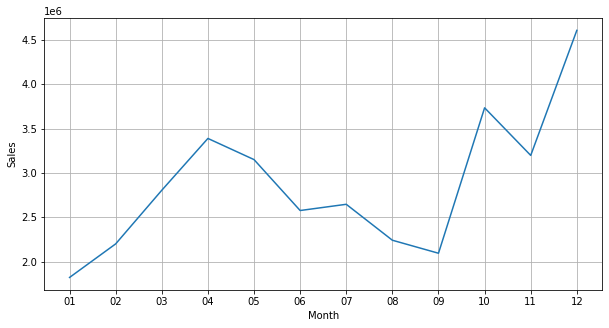

In [172]:
temp = sales_df.groupby(sales_df['Order Date'].dt.strftime('%m'))['Sales'].sum()
sales_month = pd.DataFrame(temp)

plt.figure(figsize=(10,5))
#plt.bar(sales_month.index, sales_month.Sales)
sns.lineplot(x=lol.index, y=lol.Sales)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.grid()
plt.show()

#### Question 2: What city sold the most product?

In [145]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(" ")[1]

sales_df["City"] = sales_df["Purchase Address"].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,Dallas (TX)
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,New York City (NY)


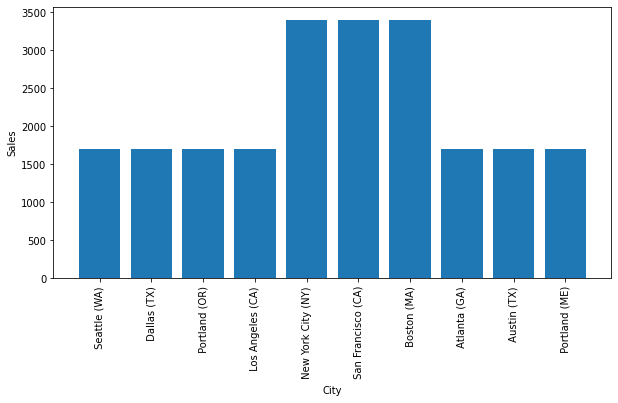

In [111]:
plt.figure(figsize=(10,5))
plt.bar(sales_df.City, sales_df.Sales)
plt.ylabel('Sales')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [170]:
sales_df['Hour'] = pd.to_datetime(sales_df['Order Date']).dt.hour
#sales_df['Minute'] = pd.to_datetime(sales_df['Order Date']).dt.minute
sales_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Hour
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,Seattle (WA),22
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,Dallas (TX),15


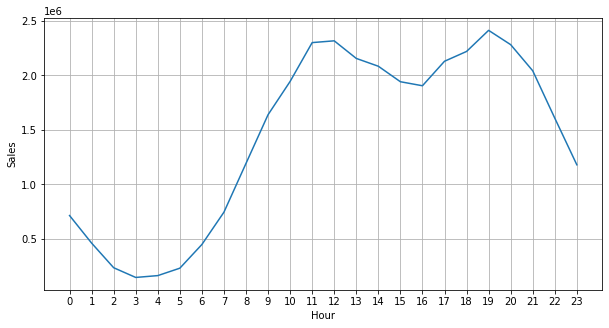

In [196]:
sales_per_hour = sales_df.groupby(['Hour'])['Sales'].sum().reset_index()
xx = range(0, len(sales_per_hour))

plt.figure(figsize=(10,5))
sns.lineplot(x=xx, y=sales_per_hour.Sales)
plt.xticks(xx)
plt.ylabel('Sales')
plt.xlabel('Hour')
plt.grid()
plt.show()

#### Question 4: What products are most often sold together?

In [223]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
sample = sales_df[sales_df['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
sample['Grouped'] = sample.groupby(['Order ID'])['Product'].transform(lambda x:", ".join(x))
sample = sample[['Order ID', 'Grouped']].drop_duplicates().reset_index(drop=True)
sample

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Grouped
0,236716,"AA Batteries (4-pack), USB-C Charging Cable"
1,236729,"iPhone, Apple Airpods Headphones"
2,236730,"Google Phone, Wired Headphones"
3,236799,"Google Phone, Wired Headphones"
4,236829,"Vareebadd Phone, USB-C Charging Cable"
...,...,...
7131,150287,"iPhone, Lightning Charging Cable"
7132,150303,"iPhone, Lightning Charging Cable"
7133,150323,"Google Phone, USB-C Charging Cable, Apple Airp..."
7134,150335,"iPhone, Apple Airpods Headphones"


In [224]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in sample['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


#### Question 5: What product sold the most? Why do you think it sold the most?

In [239]:
sales_df.groupby(['Product']).mean()['Price Each']

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

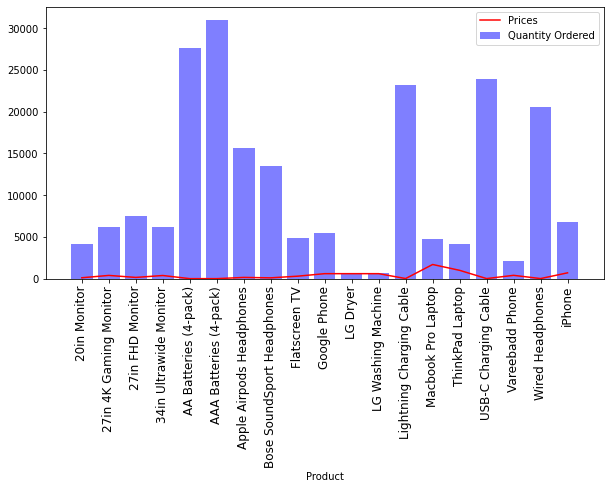

In [245]:
sample = sales_df.groupby(['Product'])['Quantity Ordered'].sum().reset_index()
prices = sales_df.groupby(['Product']).mean()['Price Each']

plt.figure(figsize=(10,5))
plt.bar(sample.Product, sample['Quantity Ordered'], color='b', alpha=.5, label='Quantity Ordered')
plt.plot(sample.Product, prices, color='r', label='Prices')

plt.xlabel('Product')
plt.legend()
plt.xticks(sample.Product, rotation='vertical', size=12)
plt.show()